<a href="https://colab.research.google.com/github/linhvuueh/-10-3-VU-PHUONG-LINH---31241023210/blob/main/%5BFASHION_MNIST_1%5D_VU_PHUONG_LINH_31241023210.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt  # Corrected import statement

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(60000, 28*28)
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape(10000, 28*28)
X_test = X_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dense(112, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=120, batch_size=64, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 112)                 │          57,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 460,506 (1.76 MB)

 Trainable params: 460,506 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.7877 - loss: 0.6031 - val_accuracy: 0.8402 - val_loss: 0.4396
Epoch 2/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8655 - loss: 0.3655 - val_accuracy: 0.8638 - val_loss: 0.3708
Epoch 3/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8799 - loss: 0.3255 - val_accuracy: 0.8676 - val_loss: 0.3784
Epoch 4/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8882 - loss: 0.2981 - val_accuracy: 0.8729 - val_loss: 0.3477
Epoch 5/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8982 - loss: 0.2776 - val_accuracy: 0.8699 - val_loss: 0.3651
Epoch 6/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9010 - loss: 0.2603 - val_accuracy: 0.8823 - val_loss: 0.3266
Epoch 7/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9078 - loss: 0.2464 - val_accuracy: 0.8703 - val_loss: 0.3896
Epoch 8/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9083 - loss: 0.2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


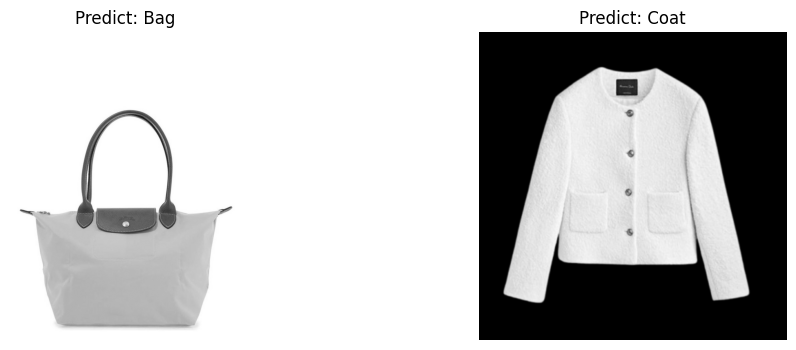

Predicted Labels: ['Bag', 'Coat']


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

fashion_mnist_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = img.astype("float32") / 255.0
    img = img.reshape(1, 784)
    return img

def predict_multiple_images(image_paths, model):
    plt.figure(figsize=(12, 4))
    predicted_labels = []

    for i, image_path in enumerate(image_paths):
        processed_img = preprocess_image(image_path)
        prediction = model.predict(processed_img)
        predicted_index = np.argmax(prediction)
        predicted_label = fashion_mnist_labels[predicted_index]
        predicted_labels.append(predicted_label)

        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, len(image_paths), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Predict: {predicted_label}")
        plt.axis('off')

    plt.show()
    return predicted_labels

image_paths = [
    '/content/440aefc4d1d2af3b53e8b00963f45263.jpg',
    '/content/Thiết kế chưa có tên.png'
]

predicted_labels = predict_multiple_images(image_paths, model)
print(f"Predicted Labels: {predicted_labels}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


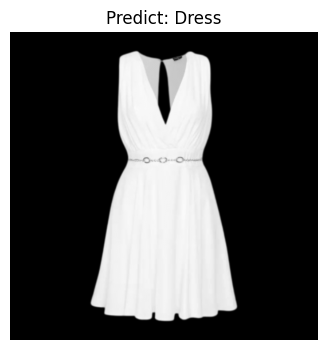

Predicted Labels: ['Dress']


In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

fashion_mnist_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = img.astype("float32") / 255.0
    img = img.reshape(1, 784)
    return img

def predict_multiple_images(image_paths, model):
    plt.figure(figsize=(12, 4))
    predicted_labels = []

    for i, image_path in enumerate(image_paths):
        processed_img = preprocess_image(image_path)
        prediction = model.predict(processed_img)
        predicted_index = np.argmax(prediction)
        predicted_label = fashion_mnist_labels[predicted_index]
        predicted_labels.append(predicted_label)

        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, len(image_paths), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Predict: {predicted_label}")
        plt.axis('off')

    plt.show()
    return predicted_labels

image_paths = [
    '/content/dr.png',
]

predicted_labels = predict_multiple_images(image_paths, model)
print(f"Predicted Labels: {predicted_labels}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


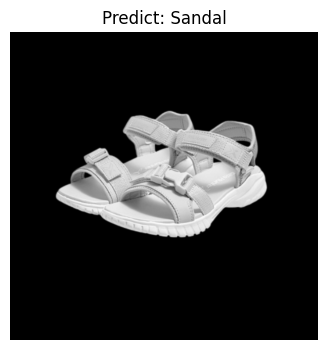

Predicted Labels: ['Sandal']


In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

fashion_mnist_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = img.astype("float32") / 255.0
    img = img.reshape(1, 784)
    return img

def predict_multiple_images(image_paths, model):
    plt.figure(figsize=(12, 4))
    predicted_labels = []

    for i, image_path in enumerate(image_paths):
        processed_img = preprocess_image(image_path)
        prediction = model.predict(processed_img)
        predicted_index = np.argmax(prediction)
        predicted_label = fashion_mnist_labels[predicted_index]
        predicted_labels.append(predicted_label)

        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, len(image_paths), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Predict: {predicted_label}")
        plt.axis('off')

    plt.show()
    return predicted_labels

image_paths = [
    '/content/sd.png',
]

predicted_labels = predict_multiple_images(image_paths, model)
print(f"Predicted Labels: {predicted_labels}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


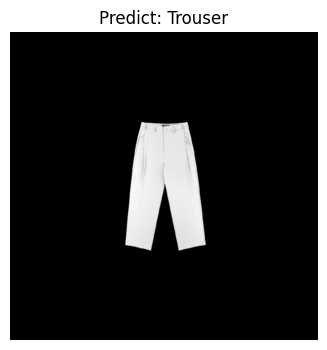

Predicted Labels: ['Trouser']


In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

fashion_mnist_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = img.astype("float32") / 255.0
    img = img.reshape(1, 784)
    return img

def predict_multiple_images(image_paths, model):
    plt.figure(figsize=(12, 4))
    predicted_labels = []

    for i, image_path in enumerate(image_paths):
        processed_img = preprocess_image(image_path)
        prediction = model.predict(processed_img)
        predicted_index = np.argmax(prediction)
        predicted_label = fashion_mnist_labels[predicted_index]
        predicted_labels.append(predicted_label)

        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, len(image_paths), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Predict: {predicted_label}")
        plt.axis('off')

    plt.show()
    return predicted_labels

image_paths = [
    '/content/shirt.png',
]

predicted_labels = predict_multiple_images(image_paths, model)
print(f"Predicted Labels: {predicted_labels}")